In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading DataFrame

In [43]:
df = pd.read_csv('games.csv')
# calculating size of the DataFrame
print(df.shape)
# reviewing the first 5 rows of the data
df.head(5)

(81312, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


### Creating a DataFrame to read the data types,unique count and null count

In [44]:

lis=df.isnull().sum()
temp = pd.DataFrame({'Types':df.dtypes,'Unique Count':df.nunique(),'Null Count':lis},index=df.columns)
print(temp)

                        Types  Unique Count  Null Count
id                      int64         79463           0
type                   object             2           0
name                   object         76035          41
yearpublished         float64           323           3
minplayers            float64            24           3
maxplayers            float64            89           3
playingtime           float64           134           3
minplaytime           float64           123           3
maxplaytime           float64           134           3
minage                float64            35           3
users_rated             int64          2147           0
average_rating        float64         17564           0
bayes_average_rating  float64         12681           0
total_owners            int64          2995           0
total_traders           int64           407           0
total_wanters           int64           540           0
total_wishers           int64          1130     

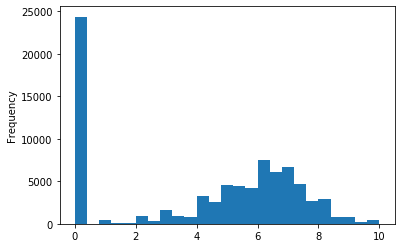

In [45]:
df['average_rating'].plot.hist(bins=25)

In [46]:
# very high number of games have an average rating of zero which is unusual
df['average_rating'].value_counts()

0.00000    24380
6.00000     2854
5.00000     2623
7.00000     2315
4.00000     2004
           ...  
4.97087        1
6.18387        1
4.79262        1
7.24762        1
5.28972        1
Name: average_rating, Length: 17564, dtype: int64

In [47]:
# it will be best to remove these rows with average rating zero because they don't help in our predictive model
df[df['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

The game basically doesn't exists and this is just a false entry.
Thus it is necessary to remove all such entries to get a higher accuracy in our prediction.

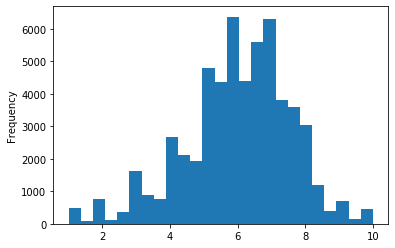

In [48]:
df=df[df['users_rated']>0]
df['average_rating'].plot.hist(bins=25)

In [49]:
# removing rows with null entries
df.dropna(axis=0,inplace = True)
df.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

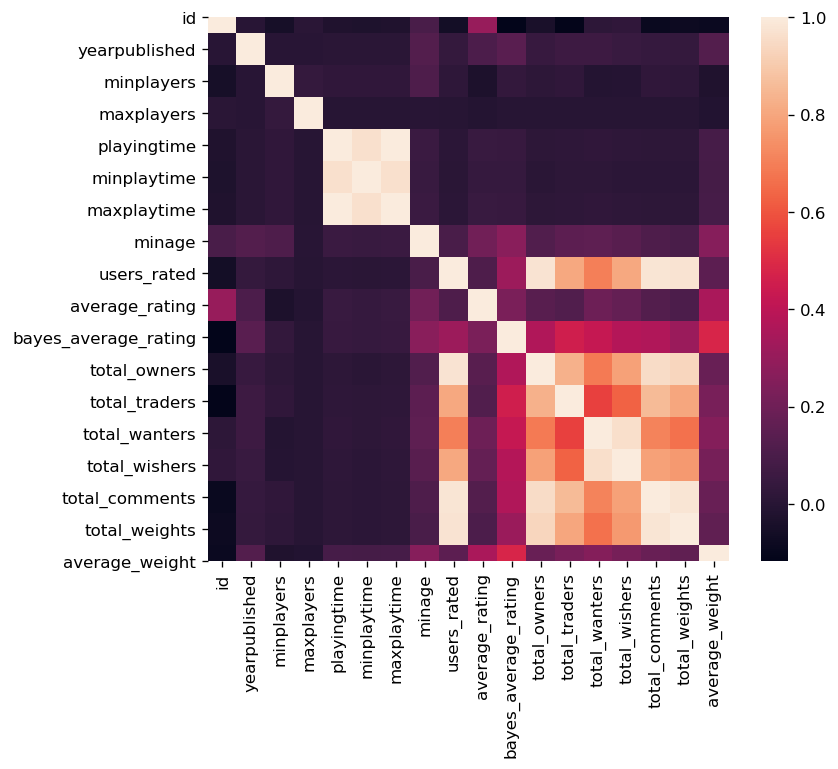

In [50]:
# Creating a Co-relation Matrix
coMat = df.corr()
plt.figure(figsize=(7,6),dpi=120)
sns.heatmap(coMat)

In [51]:
# removing unnecassry columns from the DataFrame as they don't influence our Predictions
df.drop(columns=['id','name','type','bayes_average_rating'],axis=1,inplace=True)
df.head(1)
df.dtypes

yearpublished     float64
minplayers        float64
maxplayers        float64
playingtime       float64
minplaytime       float64
maxplaytime       float64
minage            float64
users_rated         int64
average_rating    float64
total_owners        int64
total_traders       int64
total_wanters       int64
total_wishers       int64
total_comments      int64
total_weights       int64
average_weight    float64
dtype: object

In [52]:
# creating our target variable
y = df['average_rating']
x = df.drop(['average_rating'],axis=1)
x.shape,y.shape

((56894, 15), (56894,))

In [53]:
# creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=97,test_size=.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45515, 15), (11379, 15), (45515,), (11379,))

In [54]:
# importing the necessary library and funtions
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error as mle

In [55]:
# predicting the review through Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
error_lr = mle(predict_lr,y_test)
error_lr

0.061325235409786266

In [56]:
# predicting the review through K-Neighbors Regression
# we need to compute the optimal value of n_neighbors inorder to make the best prediction
def elbow_curve(K):
    error=[]
    for i in K:
        kn = KNeighborsRegressor(n_neighbors=i)
        kn.fit(x_train,y_train)
        predict = kn.predict(x_test)
        error.append(mle(predict,y_test))
    return error

In [57]:
K = range(2,50,2)
error = elbow_curve(K)

Text(0, 0.5, 'Error')

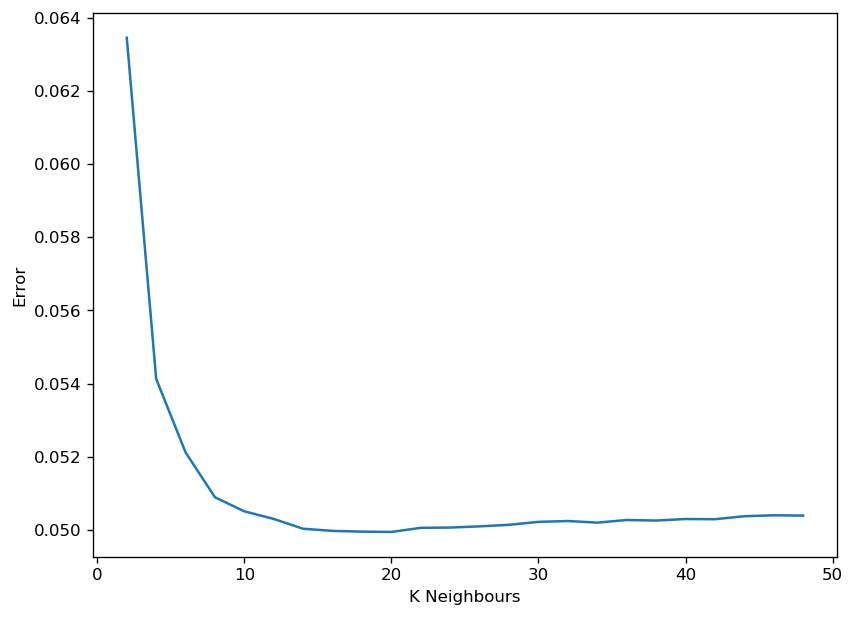

In [58]:
plt.figure(figsize=(8,6),dpi=120)
plt.plot(K,error)
plt.xlabel('K Neighbours')
plt.ylabel('Error')

In [59]:
for i in range(15,20):
    kn = KNeighborsRegressor(n_neighbors=i)
    kn.fit(x_train,y_train)
    predict = kn.predict(x_test)
    err = mle(predict,y_test)
    print(err," ",i)

0.04988790218024253   15
0.049973228995494126   16
0.05004920470575324   17
0.04995370413643905   18
0.04999307391887033   19


### The least error comes out be on 18. Thus we can set our value of n_neighbours = 18


In [60]:
kn = KNeighborsRegressor(n_neighbors=18)
kn.fit(x_train,y_train)
predict_kn = kn.predict(x_test)
error_kn = mle(predict,y_test)
error_kn 

0.04999307391887033

### Decision Tree Prediction

Varying the maximum depth of the DecisionTree to find optimal Predictor

In [61]:
train_score=[]
test_score=[]
for i in range(1,21):
    dt = DecisionTreeRegressor(max_depth=i,random_state=97)
    dt.fit(x_train,y_train)
    train_score.append(dt.score(x_train,y_train))
    test_score.append(dt.score(x_test,y_test))    

In [62]:
data = pd.DataFrame({'Depth':range(1,21),'Train Score':train_score,'Test Score':test_score})
data

,Depth,Train Score,Test Score
0,1,0.150825,0.152648
1,2,0.231043,0.234153
2,3,0.280135,0.277859
3,4,0.305454,0.301570
4,5,0.326558,0.317773
5,6,0.345366,0.328988
6,7,0.364676,0.338305
7,8,0.386254,0.340496
8,9,0.411442,0.337615
9,10,0.443715,0.332746


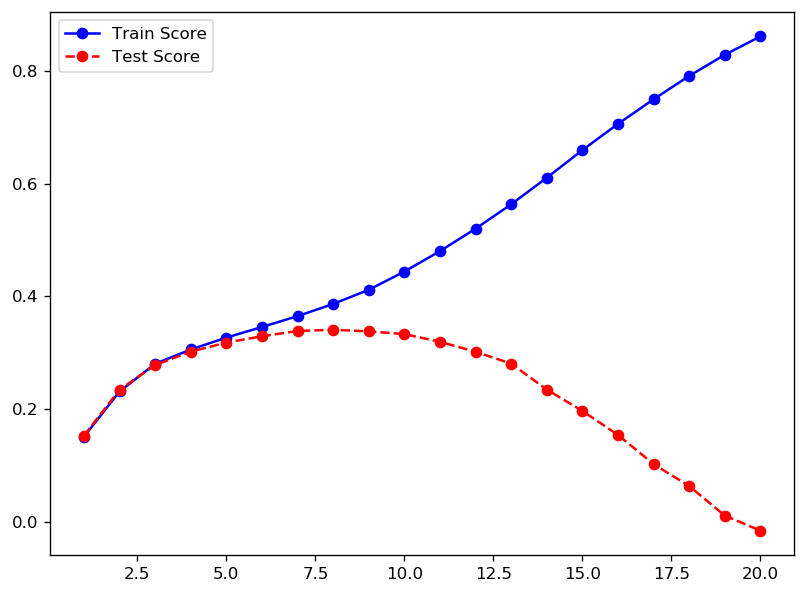

In [63]:
plt.figure(figsize=(8,6),dpi=120)
plt.plot(data['Depth'],data['Train Score'],color='blue',label = 'Train Score',marker='o')
plt.plot(data['Depth'],data['Test Score'],color='red',label='Test Score',marker='o',linestyle='dashed')
plt.legend()

Taking the maximum depth as 8 as it gives the optimal results

## Changing the leaf count keeping max depth 8

In [64]:
train_score=[]
test_score=[]
for i in range(2,21):
    dt = DecisionTreeRegressor(max_depth=8,max_leaf_nodes=i,random_state=97)
    dt.fit(x_train,y_train)
    train_score.append(dt.score(x_train,y_train))
    test_score.append(dt.score(x_test,y_test))    

In [66]:
data = pd.DataFrame({'Leaf':range(2,21),'Train Score':train_score,'Test Score':test_score})
data

,Leaf,Train Score,Test Score
0,2,0.150825,0.152648
1,3,0.201871,0.203697
2,4,0.231043,0.234153
3,5,0.249579,0.248378
4,6,0.266420,0.267110
5,7,0.274385,0.274706
6,8,0.280949,0.279399
7,9,0.286699,0.282552
8,10,0.290689,0.287341
9,11,0.294286,0.290567


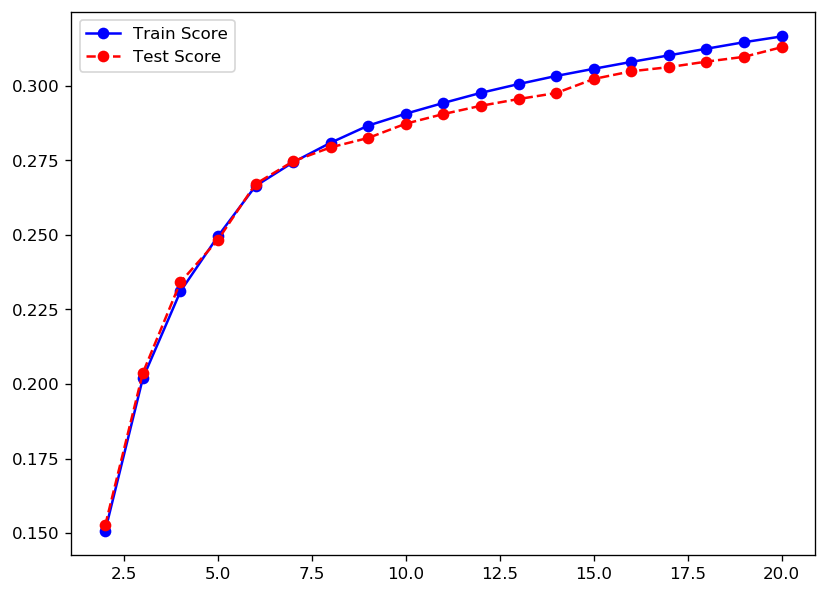

In [67]:
plt.figure(figsize=(8,6),dpi=120)
plt.plot(data['Leaf'],data['Train Score'],color='blue',label = 'Train Score',marker='o')
plt.plot(data['Leaf'],data['Test Score'],color='red',label='Test Score',marker='o',linestyle='dashed')
plt.legend()

Taking number of leaf_node = 3

In [68]:
#Making final prediction
dt = DecisionTreeRegressor(max_depth=8,max_leaf_nodes=3,random_state=97)
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=97, splitter='best')

In [70]:
predict_dt = dt.predict(x_test)
score_dt = dt.score(x_test,y_test)
err_dt = mle(predict_dt,y_test)
err_dt

0.05831201061247004

## Using ensemble method to take the mean of all predictions form all the models and thus get the best prediction with minimum error

### Taking Average of all Predictions

In [72]:
final_predict=[]
from statistics import mean
for i in range(len(y_test)):
    final_predict.append(mean([predict_dt[i],predict_lr[i],predict_kn[i]]))
final_predict[:10]

[5.206979692793484,
 6.770557954983704,
 5.405998483464299,
 6.589655617881997,
 5.545814257420375,
 7.032033023575118,
 6.449734696257063,
 5.1919187280287,
 6.569560398959164,
 6.477536844755825]

In [73]:
mle(final_predict,y_test)

0.0527290149533591

In [74]:
err_dt,error_kn,error_lr

(0.05831201061247004, 0.04999307391887033, 0.061325235409786266)

The final prediction seems to performing worse than KNeighbor.
Thus using the Rank Averaging

### Rank Averaging

In [82]:
data = pd.DataFrame({'Predictor':['Decision Tree','KNeighbor','LinearRegressor'],'Error':[err_dt,error_kn,error_lr]},index=[1,2,3])
data

,Predictor,Error
1,Decision Tree,0.058312
2,KNeighbor,0.049993
3,LinearRegressor,0.061325


In [83]:
data=data.sort_values('Error',ascending=False)
data

,Predictor,Error
3,LinearRegressor,0.061325
1,Decision Tree,0.058312
2,KNeighbor,0.049993


In [84]:
data['Rank'] = [i for i in range(1,4)]
data

,Predictor,Error,Rank
3,LinearRegressor,0.061325,1
1,Decision Tree,0.058312,2
2,KNeighbor,0.049993,3


In [85]:
Sum = data['Rank'].sum()
data['Weight'] = data['Rank']/Sum
data

,Predictor,Error,Rank,Weight
3,LinearRegressor,0.061325,1,0.166667
1,Decision Tree,0.058312,2,0.333333
2,KNeighbor,0.049993,3,0.500000


In [105]:
wt_pred_lr = predict_lr*float(data.loc[[3],['Weight']].values)
wt_pred_kn = predict_kn*float(data.loc[[2],['Weight']].values)
wt_pred_dt = predict_dt*float(data.loc[[1],['Weight']].values)
final = wt_pred_dt+wt_pred_kn+wt_pred_lr
final[:10]

array([5.1791073 , 6.88402133, 5.3572691 , 6.54115896, 5.57763976,
       7.11768655, 6.44634795, 5.13309959, 6.54051135, 6.52014235])

In [106]:
mle(final,y_test)

0.051083191667496246

Still the predictor is weaker than KNeighbor 
Thus we will do our final predictions with KNeighbor, ignoring ensemble approach